<a href="https://colab.research.google.com/github/TrevorChess25/wine-data-clf/blob/main/project1_wine_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Classification with K-Nearest Neighbors

Names: Trevor Chessnoe, Miguel LLanes, Olivia Schafer <br>
Date completed: 11-11-2024 <br>
Project 1: Group 6 <br>
Dataset: https://archive.ics.uci.edu/dataset/186/wine+quality

## Import and Select Data

In [ ]:
import pandas as pd
red_wine = pd.read_csv('winequality-red.csv', sep=';')
white_wine = pd.read_csv('winequality-white.csv', sep=';')
# Combine red and white wine into single dataset
data = pd.concat([red_wine, white_wine], axis=0)
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Understanding the Data

In [ ]:
print("Wine data shape:", data.shape)
features = data.columns.to_list()
print("Data features: ", features)

# Show avgs for white wine features
data_means = pd.DataFrame(data.mean())
data_means.columns = ['Wine Data Means']

print(data_means)

Wine data shape: (6497, 12)
Data features:  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
                      Wine Data Means
fixed acidity                7.215307
volatile acidity             0.339666
citric acid                  0.318633
residual sugar               5.443235
chlorides                    0.056034
free sulfur dioxide         30.525319
total sulfur dioxide       115.744574
density                      0.994697
pH                           3.218501
sulphates                    0.531268
alcohol                     10.491801
quality                      5.818378


## Bar Graph of Wine Quality Scores

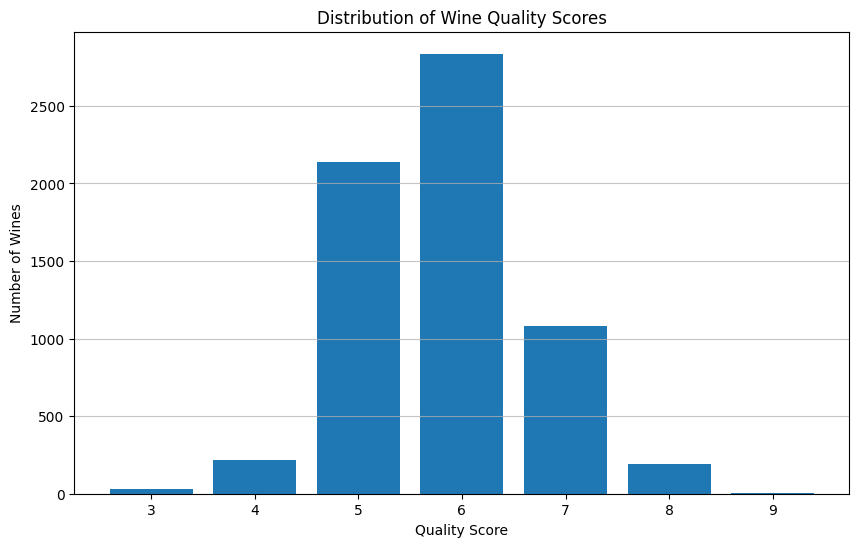

3/10: 0.46%
4/10: 3.32%
5/10: 32.91%
6/10: 43.65%
7/10: 16.61%
8/10: 2.97%
9/10: 0.08%


In [ ]:
# Bar graph of the quality
import matplotlib.pyplot as plt

# Calculate data quality metrics (example: using 'quality' column)
quality_counts = data['quality'].value_counts().sort_index()

# Create the bar graph
plt.figure(figsize=(10, 6))
plt.bar(quality_counts.index, quality_counts.values)
plt.xlabel("Quality Score")
plt.ylabel("Number of Wines")
plt.title("Distribution of Wine Quality Scores")
plt.xticks(quality_counts.index)  # Ensure all quality scores are displayed on x-axis
plt.grid(axis='y', alpha=0.75)
plt.show()

# Output percentages of scores for report
total_count = data.shape[0]
percentages = [count / total_count * 100 for count in quality_counts]
# Print percent amount for quality score 3-9
for i in range(3,10):
  print(f"{i}/10: {round(percentages[i-3],2)}%")

Quality scores for the wine were given by critics, who were asked to rate the wines they tasted out of ten. The study briefly mentions each wine being categorized as poor, normal or excellent. Since these labels were nowhere to be found in the dataset itself, we decided to create bins for the data. This vastly simpified our graphical representations of KNN classification.

# Discretizing quality scores

In [ ]:
# bins for wine quality 3-5 is poor 6-7 is normal and 8-10 is excellent
bins = [3,4,7,10]
bin_labels = ['poor', 'normal', 'excellent']

# Rename quality/10 to score to prevent confusion with quality labels for clf
data['score'] = data['quality']
# Use cut to sort quality into bins
data['quality'] = pd.cut(data['score'], bins=bins, labels=bin_labels, include_lowest=True)

# Create seperate labels vector to avoid complex df syntax
labels = data['quality'].to_numpy()

## Bar Graph of Wine Quality Labels

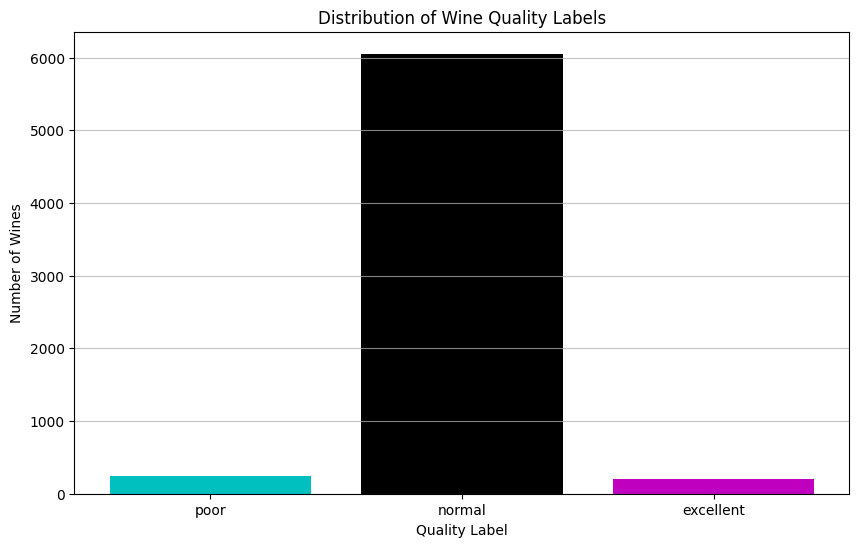

In [ ]:
# Bar graph of the quality

import matplotlib.pyplot as plt

# Calculate data quality metrics (example: using 'quality' column)
quality_counts = data['quality'].value_counts().sort_index()

# Create the bar graph
plt.figure(figsize=(10, 6))
colors = ['c','k','m']
plt.bar(quality_counts.index, quality_counts.values, color=colors)
plt.xlabel("Quality Label")
plt.ylabel("Number of Wines")
plt.title("Distribution of Wine Quality Labels")
plt.xticks(quality_counts.index)  # Ensure all quality scores are displayed on x-axis
plt.grid(axis='y', alpha=0.75)
plt.show()

## Pie chart of wine quality labels

([<matplotlib.patches.Wedge at 0x7fd6b27fc8e0>,
 [Text(1.092226890299909, 0.13053896010690025, 'poor'),
  Text(-1.099703721192361, -0.025528916852740863, 'normal'),
  Text(1.0949622690348961, -0.10515526325368701, 'excellent')],
 [Text(0.5957601219817684, 0.07120306914921831, '3.79%'),
  Text(-0.5998383933776513, -0.01392486373785865, '93.17%'),
  Text(0.5972521467463069, -0.05735741632019291, '3.05%')])

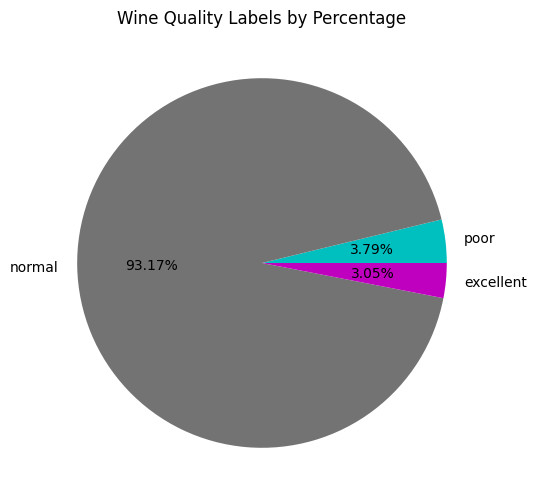

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Wine Quality Labels by Percentage")
pie_labels = bin_labels
colors = ['c','0.45','m']
plt.pie(quality_counts, labels=pie_labels, colors=colors, autopct='%1.2f%%')

## Understanding the distribution of labels

In [ ]:
import numpy as np
poor_data = data[labels=='poor']
print("Num of poor quality wines: "+ str(len(poor_data))+"\n")

normal_data = data[labels=='normal']
print("Num of normal quality wines: "+ str(len(normal_data))+"\n")

excellent_data = data[labels=='excellent']
print("Num of normal quality wines: "+ str(len(excellent_data))+"\n")

print("Total num of wines: "+str(len(labels)))

Num of poor quality wines: 246

Num of normal quality wines: 6053

Num of normal quality wines: 198

Total num of wines: 6497


The wine dataset contains a disproportionately large number of normal quality wines. The author of the page we got the page from mentions this as well. Since there is no way we can split the bins to create an even distribution (scores are heavily weighted towards 5 and 6), we decided it would be best to use a subset of the normal quality wines to train our model on.

## Rebalancing dataset to improve performance

In [ ]:
# Separate normal quality wine into own df for sampling
normal_data = data[data['quality']=='normal']
# Remove 'normal' quality wines from dataset
data = data[data['quality']!='normal']

# Remove 96.5% of normal quality wine to rebalance datset
num_remaining = int(0.035 * len(normal_data))
print("Normal quality wines reamining: "+str(num_remaining)+"/"+str(len(normal_data)))
normal_subset = normal_data.sample(n=num_remaining, random_state=42)

# Add filtered normal data back to dataset
data = pd.concat([normal_subset, data])

Normal quality wines reamining: 211/6053


## Dataset cleanup for later steps

In [ ]:
# Reassign filtered quality labels to labels
labels = data['quality'].to_numpy()
# Remove quality column to prevent err when scaling
data = data.drop('quality', axis=1)

In [ ]:
poor_data = data[labels=='poor']
print("Num of poor quality wines: "+ str(len(poor_data))+"\n")

normal_data = data[labels=='normal']
print("Num of normal quality wines: "+ str(len(normal_data))+"\n")

excellent_data = data[labels=='excellent']
print("Num of excellent quality wines: "+ str(len(excellent_data))+"\n")

Num of poor quality wines: 246

Num of normal quality wines: 211

Num of excellent quality wines: 198



Now, we have encountered a new problem. How do we graph data with 11 features on a 2-D graph. There are a number of possible approaches, but we chose to use Principal Component Analysis. <br>
We must do a train-test split for the original data, which will be used to fit the model. AND the projected data after its dimensionality has been reduced so it can be graphed with the proper predicted labels.

# Use KNN with 80-20 Train-test split

## 80-20 train-test split for original dataset (k=2)

In [ ]:
from sklearn.model_selection import train_test_split
# Split dataset into training and test data and their quality labels
train_data, test_data, train_lbl, test_lbl = train_test_split(data,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=42)

## Normalize data feature ranges & Perform PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Normalize value ranges for features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Project 11-D wine data to 2-D space for graphing
pca = PCA(n_components=2)
proj_data = pca.fit_transform(scaled_data)

print(pd.DataFrame(proj_data).head(5))

# Explained variance represents the amount of original data's variance maintained after PCA
# The output of the EVR shows exp variance for each dimension
print("Explained Variance: ", pca.explained_variance_ratio_)

          0         1
0 -0.936172  0.175652
1 -2.315615 -0.727737
2 -0.125750  0.456707
3 -0.944475 -0.267571
4 -1.139622  0.504996
Explained Variance:  [0.24376683 0.21575114]


## 80-20 train-test split for 2-D Projection

In [ ]:
# Split scaled/projected data into training and test data and their quality labels
proj_train_data, proj_test_data, proj_train_lbl, proj_test_lbl = train_test_split(proj_data,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=42)

## Fit model and make predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Choosing number of nearest neighbors
model = KNeighborsClassifier(n_neighbors=2)

# Fit & predict
model.fit(train_data, train_lbl)
pred_lbl = model.predict(test_data)

## Evaluate classification performance

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("Accuracy Score: ", accuracy_score(test_lbl, pred_lbl))
print("Precision Score: ", precision_score(test_lbl, pred_lbl, average = 'macro'))
print("Recall Score: ", recall_score(test_lbl, pred_lbl, average = 'macro'))
print("F1 Macro Score: ", f1_score(test_lbl, pred_lbl, average = 'macro'))

Accuracy Score:  0.5725190839694656
Precision Score:  0.6139888274231036
Recall Score:  0.6180837926568477
F1 Macro Score:  0.5753220611916264


## Confusion Matrix

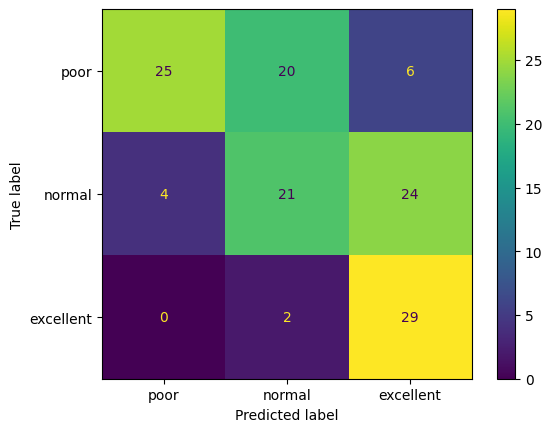

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_labels = bin_labels
cm = confusion_matrix(test_lbl, pred_lbl,
                              labels = cm_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot()

## Graph Test pts and Nearest Neighbors

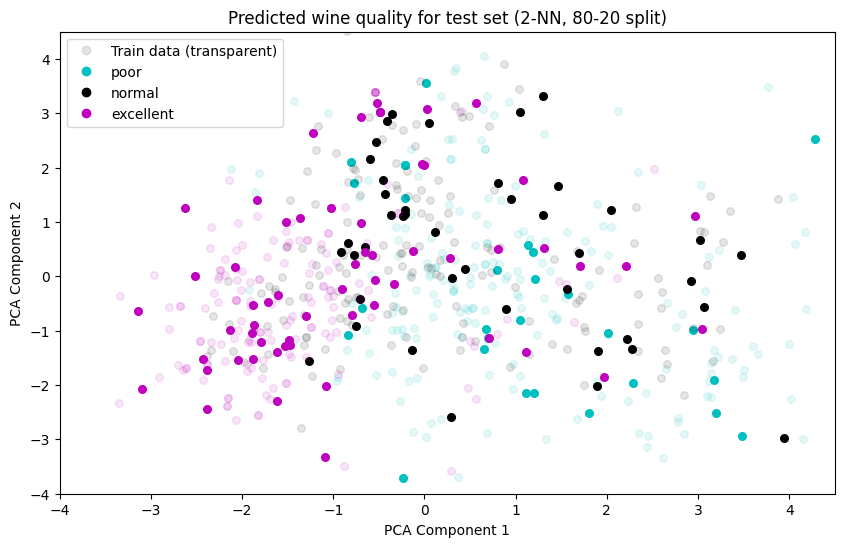

In [ ]:
import matplotlib.lines as mlines
# X and y are 1nd and 2nd coords of PCA projected train data
X_train = proj_train_data[:,0]
y_train = proj_train_data[:,1]

X_test = proj_test_data[:,0]
y_test = proj_test_data[:,1]

# Set graph size, axis labels and title
plt.figure(figsize=(10, 6))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Predicted wine quality for test set (2-NN, 80-20 split)')
plt.xlim(-4,4.5)
plt.ylim(-4,4.5)

# Set labels for point classes to the wine quality bins
plot_lbl = bin_labels
# Set colors for points
colors = ['c','k','m']
pt_size = 30
pt_alpha = 0.1

# Plot points from the training data using colors assigned based on class
for i in range(0,3):
  # Plot training data
  plt.scatter(X_train[train_lbl==plot_lbl[i]], y_train[train_lbl==plot_lbl[i]], label=plot_lbl[i], s=pt_size, color=colors[i], alpha = pt_alpha)
  # Plot test data
  plt.scatter(X_test[pred_lbl==plot_lbl[i]], y_test[pred_lbl==plot_lbl[i]], label=plot_lbl[i], s=pt_size, color=colors[i])

# Create custom legend to show what transparent pts represent
legend_elements = [
    mlines.Line2D([], [], marker='o', color='k', alpha = pt_alpha, label='Train data (transparent)',  linestyle='None'),
    mlines.Line2D([], [], marker='o', color='c', label='poor', linestyle='None'),
    mlines.Line2D([], [], marker='o', color='k', label='normal',  linestyle='None'),
    mlines.Line2D([], [], marker='o', color='m', label='excellent', linestyle='None'),
  ]

# Display plot w/ custom legend
plt.legend(handles=legend_elements)
plt.show()

## 80-20 train-test split for original dataset (k=3)

In [ ]:
train_data, test_data, train_lbl, test_lbl = train_test_split(data,
                                                    labels,
                                                    test_size=0.2,
                                                    random_state=42)

## Re-fit model and make new predictions

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Choosing number of nearest neighbors
model = KNeighborsClassifier(n_neighbors=3)

# Fit & predict
model.fit(train_data, train_lbl)
pred_lbl = model.predict(test_data)

# Reevaluate classification performance

In [ ]:
print("Accuracy Score: ", accuracy_score(test_lbl, pred_lbl))
print("Precision Score: ", precision_score(test_lbl, pred_lbl, average = 'macro'))
print("Recall Score: ", recall_score(test_lbl, pred_lbl, average = 'macro'))
print("F1 Macro Score: ", f1_score(test_lbl, pred_lbl, average = 'macro'))

Accuracy Score:  0.6183206106870229
Precision Score:  0.6279418057338468
Recall Score:  0.6449160309285005
F1 Macro Score:  0.6165481516269978


## Confusion Matrix

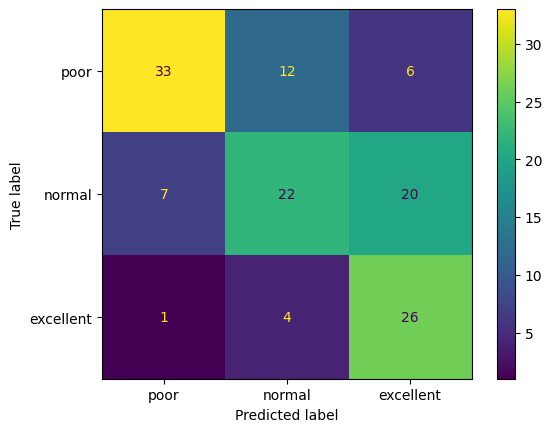

In [ ]:
cm_labels = bin_labels
cm = confusion_matrix(test_lbl, pred_lbl,
                              labels = cm_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cm_labels)
disp.plot()